Importing required libraries and defining a random seed

In [26]:
from random import seed as set_seed
import numpy
from tensorflow import keras
from sklearn.model_selection import train_test_split

RANDOM_SEED_VALUE = 42

# Specify each path

In [27]:
dataset_path = 'model/classifier/data.csv'
model_path = 'model/classifier/model.hdf5'

# Loading the input features and target labels from a CSV file

In [28]:
CLASS_COUNT = 10
X_data = numpy.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_data = numpy.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=RANDOM_SEED_VALUE)


# Defining a Sequential model using TensorFlow

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Input

model = Sequential([
    Input((21*2, )),
    
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(CLASS_COUNT, activation='softmax')
])


# Adding a model checkpoint callback

In [30]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=model_path, verbose=1, save_weights_only=False
)

 # Adding an early stopping callback

In [31]:
early_stopping_callback = keras.callbacks.EarlyStopping(patience=20, verbose=1)


# Compiling the model

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Training the model

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/1000
48/62 [======================>.......] - ETA: 0s - loss: 1.5805 - accuracy: 0.5036 
Epoch 1: saving model to model/classifier/model.hdf5
62/62 [==============================] - 1s 4ms/step - loss: 1.4370 - accuracy: 0.5673 - val_loss: 1.6587 - val_accuracy: 0.6036
Epoch 2/1000
50/62 [=======================>......] - ETA: 0s - loss: 0.6872 - accuracy: 0.8631
Epoch 2: saving model to model/classifier/model.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.8733 - val_loss: 1.0846 - val_accuracy: 0.8938
Epoch 3/1000
48/62 [======================>.......] - ETA: 0s - loss: 0.4148 - accuracy: 0.9233

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/classifier/model.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.9303 - val_loss: 0.7085 - val_accuracy: 0.9075
Epoch 4/1000
49/62 [======================>.......] - ETA: 0s - loss: 0.2716 - accuracy: 0.9577
Epoch 4: saving model to model/classifier/model.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9593 - val_loss: 0.4227 - val_accuracy: 0.9323
Epoch 5/1000
49/62 [======================>.......] - ETA: 0s - loss: 0.2006 - accuracy: 0.9676
Epoch 5: saving model to model/classifier/model.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9703 - val_loss: 0.2141 - val_accuracy: 0.9828
Epoch 6/1000
49/62 [======================>.......] - ETA: 0s - loss: 0.1509 - accuracy: 0.9823
Epoch 6: saving model to model/classifier/model.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9827 - val_loss: 0.1043 - val_

# Evaluating the model

In [34]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test, batch_size=128)

16/16 [==============================] - 0s 713us/step - loss: 9.2429e-07 - accuracy: 1.0000


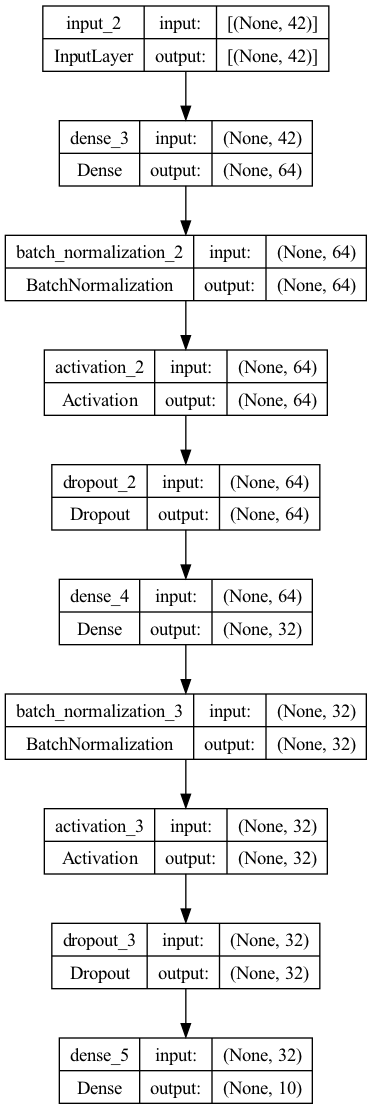

In [35]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


# Loading saved models

In [36]:

loaded_model = keras.models.load_model(model_path)


# Testing the model's reasoning

In [37]:
prediction_result = loaded_model.predict(numpy.array([X_test[0]]))
print(numpy.squeeze(prediction_result))
print(numpy.argmax(numpy.squeeze(prediction_result)))

1/1 [==============================] - 0s 72ms/step
[2.9115058e-11 3.5292207e-09 4.8141369e-10 7.1476644e-11 1.0000000e+00
 9.0062652e-10 9.0309921e-12 7.3841999e-10 1.6046915e-10 1.1433011e-13]
4


#  Importing libraries for visualization and defining a confusion matrix function

62/62 [==============================] - 0s 466us/step


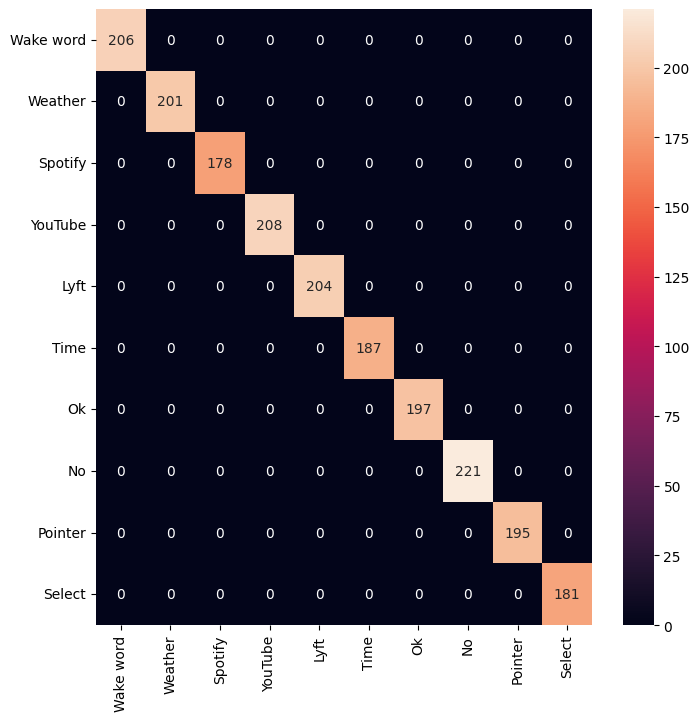

Classification Report
              precision    recall  f1-score   support

  ﻿Wake word       1.00      1.00      1.00       206
     Weather       1.00      1.00      1.00       201
     Spotify       1.00      1.00      1.00       178
     YouTube       1.00      1.00      1.00       208
        Lyft       1.00      1.00      1.00       204
        Time       1.00      1.00      1.00       187
          Ok       1.00      1.00      1.00       197
          No       1.00      1.00      1.00       221
     Pointer       1.00      1.00      1.00       195
      Select       1.00      1.00      1.00       181

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



In [52]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def read_label_file(label_file_path):
    with open(label_file_path, "r") as label_file:
        label_names = label_file.read().splitlines()
    return label_names

def display_confusion_matrix(y_actual, y_predicted, label_names, show_report=True, save_path=None):
    cmx_data = confusion_matrix(y_actual, y_predicted)
    confusion_matrix_df = pd.DataFrame(cmx_data, index=label_names, columns=label_names)
    
    figure, axis = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_matrix_df, annot=True, fmt='g', square=False)
    axis.set_ylim(len(label_names), 0)
    
    if save_path:
        plt.savefig(save_path + "_confusion_matrix.png")
    
    plt.show()
    
    if show_report:
        report = classification_report(y_actual, y_predicted, target_names=label_names)
        if save_path:
            with open(save_path + "_classification_report.txt", "w") as report_file:
                report_file.write(report)
        print('Classification Report')
        print(report)
    
    return confusion_matrix_df

# Path to the label file
label_file_path = "./model/classifier/label.csv"

# Read label names from the file
label_names = read_label_file(label_file_path)

Y_predicted = loaded_model.predict(X_test)
y_predicted = np.argmax(Y_predicted, axis=1)

confusion_matrix_df = display_confusion_matrix(y_test, y_predicted, label_names, save_path="results")
